In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_classification 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

import time
import os

### Metrics RF con ANOVA (monograms)

In [85]:
## Load pickle
result_dict = pd.read_pickle("../training_scripts/monograms/AN_XG.pickle")

In [86]:
result_dict.keys()

dict_keys(['y_tst_list', 'ids_tst_list', 'y_pred_list', 'y_proba_list', 'val_score_list', 'best_param_list', 'tst_score_list', 'conf_matrix_list'])

In [87]:
# Error validaction/test medio
average_validation_score = np.mean(result_dict['val_score_list'])
average_test_score = np.mean(result_dict['tst_score_list'])
std_validation_score = np.std(result_dict['val_score_list'])
std_test_score = np.std(result_dict['tst_score_list'])
print(f'validation score {average_validation_score:.2f} +- {std_validation_score:.3f}')
print(f'test score {average_test_score:.2f} +- {std_test_score:.2f}')


validation score 0.82 +- 0.005
test score 0.82 +- 0.03


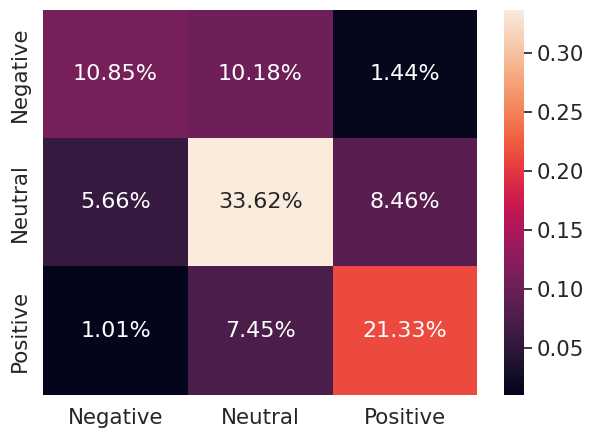

In [88]:
# Mean confusion matrix
conf_matrix_list = result_dict["conf_matrix_list"]
n_muestras = [np.sum(matrix) for matrix in conf_matrix_list]
set(n_muestras)
# Media de las matrices
mean_conf_matrix = np.mean(np.divide(conf_matrix_list,131), axis = 0)

# Plot confusion matrix with %
classes = ["Negative","Neutral", "Positive"]
df_cm = pd.DataFrame(mean_conf_matrix, classes, classes)
plt.figure(figsize=(7,5))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='.2%') # font size
plt.show()

In [81]:
# AUC OvR medio

classes = ['Negative', 'Neutral', 'Positive']

roc_auc_ovr_by_experiment = []

for j in range(50): 

    roc_auc_ovr = {}
    y_tst_list = result_dict['y_tst_list'][j]
    y_proba_list = result_dict['y_proba_list'][j]

    for i, c in enumerate(classes):
        # Prepares an auxiliar dataframe
        aux_tst_class = [1 if y == i else 0 for y in y_tst_list]
        aux_tst_prob = y_proba_list[:, i]

        # Calculates the ROC AUC OvR
        roc_auc_ovr[c] = roc_auc_score(aux_tst_class, aux_tst_prob)

    roc_auc_ovr_by_experiment.append(roc_auc_ovr)

df_aux = pd.DataFrame(roc_auc_ovr_by_experiment)
df_aux = df_aux.reset_index(drop = True)

In [82]:
df_aux.mean().round(2)

Negative    0.82
Neutral     0.74
Positive    0.88
dtype: float64

In [83]:
df_aux.std().round(2)

Negative    0.04
Neutral     0.04
Positive    0.03
dtype: float64

In [146]:
unique_values = []
count_values = []
for array in y_tst_list:
    unique, counts = np.unique(array, return_counts=True)
    unique_values.append(unique)
    count_values.append(counts)

n_labels = pd.DataFrame(list(zip(unique_values, count_values)))
n_labels = n_labels.reset_index(drop = True) 

In [147]:
n_labels

,0,1
0,"[0, 1, 2]","[32, 59, 40]"
1,"[0, 1, 2]","[31, 60, 40]"
2,"[0, 1, 2]","[36, 62, 33]"
3,"[0, 1, 2]","[22, 67, 42]"
4,"[0, 1, 2]","[30, 56, 45]"
5,"[0, 1, 2]","[20, 69, 42]"
6,"[0, 1, 2]","[26, 58, 47]"
7,"[0, 1, 2]","[35, 54, 42]"
8,"[0, 1, 2]","[27, 60, 44]"
9,"[0, 1, 2]","[29, 65, 37]"
